# Root finding algorithms for non-lineer systems
In this experiment we will calculate two specific roots for the functions $x^2 + 2x - 15$, $x^{3} + 7x^{2} - 170x$ using 4 different root finding algorithms. The aim of using the same 2 functions and guess, range etc. values, is to compare all methods easily. <br>
## Bisection Method
First one to consider is the bisection method. Bisection method has the advantage of requiring minimum knowledge about the function (f to be continuous on the given range). It is also really simple and guaranteed to converge. Although it is a robust method, we cannot really say that it is efficient. Also it is not an easy task to generalize it to higher dimensions (for example selecting the range could be a huge problem for a function with roots that are close to each other and is really steep between them). The method could be a solid choice when it comes to simple functions with lower dimensions so to say.<br> <br>
Let's start writing the method.<br>
First, let's define the functions that we will use throughout the whole experiment and import the needed modules.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np

f = np.poly1d([1, 2, -15])
f2 = np.poly1d([0, -17, 10], True)

Now we can move on to writing the bisection method.

In [2]:
def Bisect(func, a, b, atol):
    #Calculate f(a) and f(b) to check the conditions
    fa = func(a)
    fb = func(b)
    
    #Check if the assumptions are correct and the conditions are satisfied
    if (a > b) or (atol <= 0) or (fa*fb > 0):
        print("Invalid input.")
        return None
    
    #Calculate the number of max iterations and define varibles to keep the values for the graph
    atol_list = []   
    n = math.ceil(math.log2(b - a) - math.log2(2 * atol))
    
    #Main for loop until it reaches n iterations
    for iter_count in range(n):
        
        #Raise iteration count by one and add the mid point as a guess
        mid_point = (a + b) / 2
        atol_list.append(mid_point)
        
        fmid = func(mid_point)
        
        #If the mid point is the solution return 
        if(fmid == 0.0):
            return [mid_point, iter_count + 1, atol_list]
        
        #If not check in which region the root is and set the boundaries
        if (fa * fmid) < 0:
            b = mid_point
            fb = fmid
        else:
            a = mid_point
            fa = fmid
            
    return [(a + b) / 2, iter_count + 1, atol_list]

Now, using the Bisect function, we can start calculating the roots. <br>
The test values are as below.

In [3]:
#Putting test variables together to make changes easily
range_a = 0
range_b = 10
real_solution = 3
real_solution2 = 10
atol = 1e-8
#Will be used in the next parts
guess = 7
guess2 = 7
guess_0 = 5
guess_02 = 5
max_iter = 100

Before finding the solution we desire, let's test our function with an invalid range to see if it works correctly.

In [4]:
#a > b; should not work
Bisect(f, 100, 1, atol)

Invalid input.


In [5]:
#The function has no roots between 20 and 30 according to the Intermediate Value Theorem; should not work
Bisect(f, 20, 30, atol)

Invalid input.


In [6]:
#atol < 0; again, should not work
Bisect(f, range_a, range_b, -1e-8)

Invalid input.


Now we are sure that the function does eliminate the invalid inputs, we can start experimenting. <br>
Using the test values we achieve the following graph.

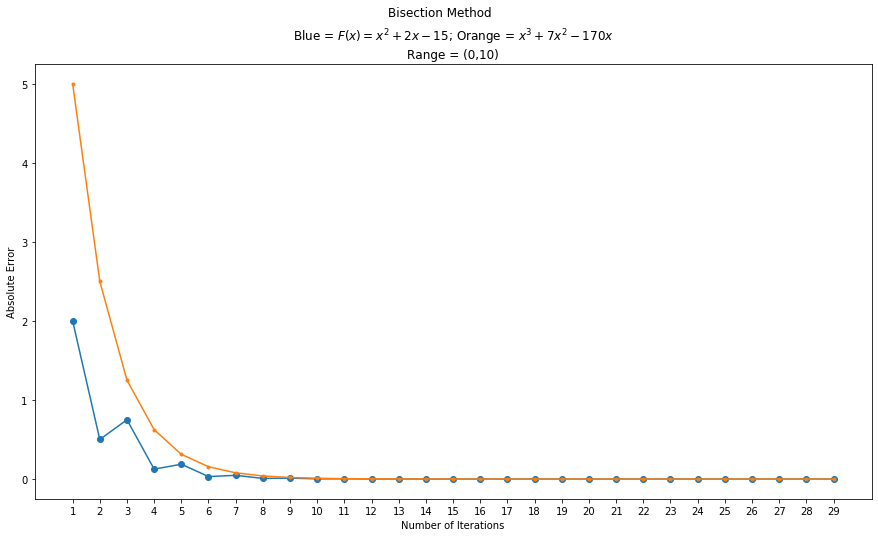

In [7]:
results = Bisect(f, range_a, range_b, atol)
results2 = Bisect(f2, range_a, range_b, atol)

plt.figure(figsize=(15,8))
ax1 = plt.plot([i + 1 for i in range(0,results[1])], [abs(results[2][i] - real_solution) for i in range(0, len(results[2]))], linestyle='-', marker = 'o')
ax2 = plt.plot([i + 1 for i in range(0,results2[1])], [abs(results2[2][i] - real_solution2) for i in range(0, len(results2[2]))], linestyle='-', marker = '.')
plt.suptitle("Bisection Method")
plt.title("Blue = $F(x) = x^{2} + 2x - 15$; Orange = $x^{3} + 7x^{2} - 170x$\nRange = (0,10)")
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error")
plt.xticks(range(1,results[1]+1))
plt.show()

And we approximate the roots as the following: 

In [8]:
print("Root in the range({0}, {1}): {2:.20f}".format(range_a, range_b, results[0]))
print("Root in the range({0}, {1}): {2:.20f}".format(range_a, range_b, results2[0]))

Root in the range(0, 10): 2.99999999813735485077
Root in the range(0, 10): 9.99999999068677425385


The results are correct and we achieve the given precision in the iteration count that we calculated before.

## Fixed Point Iteration Method
This method requires preliminary study as opposed to bisection method. We need to find a function $g(x)$ that will converge and this might not be a matter that is straightforward. The advantage of this method is though, $g(x)$ determines the convergence rate while in bisection it is a fixed value which is 0.5. That means we can find a $g(x)$ such that the method will converge really fast and will achieve the solution before bisection. Even though it is not a robust way to find the root, it can be really efficient under right circumstances. <br>
To implement this method, first we need a $g(x)$ such that $f(x) = 0$ and $g(x) = x$.<br>
For the function $f(x) = x^2 + 2x -15$, we can select $g(x)$ as $g(x) = \frac{15}{x+2}$ since; <br> <br>
$x^2 + 2x = 15$<br>
$x(x + 2) = 15$ <br>
$x_{n+1} = \frac{15}{x_n + 2}$ <br> <br>
We can apply convergence test to see if it will converge at the root mathematically. <br><br>
$g'(x) = -\frac{15}{(x + 2)^ {2}}$ <br>
$g'(3) = -\frac{15}{(3 + 2)^ {2}} = -\frac{15}{25}$ <br>
$|-\frac{15}{25}| < 1$ <br><br>
Hence, it should converge. <br>
For the function $f(x) = x^{3} + 7x^{2} - 170x$, we can choose $g(x)$ as $g(x) = \frac{170}{x+7}$ since; <br><br>
$x^{3} + 7x^{2} = 170x$<br>
$x(x^{2} + 7x) = 170x$ <br>
$x = \frac{170x}{(x^{2} + 7x)}$<br>
$x= \frac{170}{x+7}$ <br><br>
Let's apply the convergence test again. <br><br>
$g'(x) = -\frac{170}{(x + 7)^ {2}}$ <br>
$g'(10) = -\frac{170}{(10 + 7)^ {2}}$ <br>
$|-\frac{170}{289}| < 1 $ <br><br>
Hence, this should converge too. <br>
The values $|-\frac{15}{25}|$ and $|-\frac{170}{289}|$ are also the rate of convergence for the selected $g(x)$.<br> <br>
$|-\frac{15}{25}| = 0.6$ ; $|-\frac{170}{289}| = 0.58823529$ <br><br>
The calculations show that it should take more iterations to find the solution with this method compared to bisection since the convergence rates are bigger than $0.5$.<br>
Now, let's define the functions and test if the experiment will match the calculations.

In [9]:
def g(x):
    return 15 / (x + 2)
def g2(x):
    return 170 / (x + 7)

In [10]:
def FixedPointIteration(g, guess, max_iter, atol):
    guess_list = []
    
    for iter_count in range(0, max_iter):
        step_error = abs(guess - g(guess))
        guess_list.append(guess)
        
        if(step_error < atol):
            return [guess, iter_count + 1, guess_list]
        
        guess = g(guess)
        
    if(step_error >= atol):
        print("Could not find the root in {0} attempts.".format(max_iter))
        return None

$guess = 7, guess2 = 7, max\_iter = 100$ and $atol = 10^{-8}$ as the test values again to easily compare it with other methods.

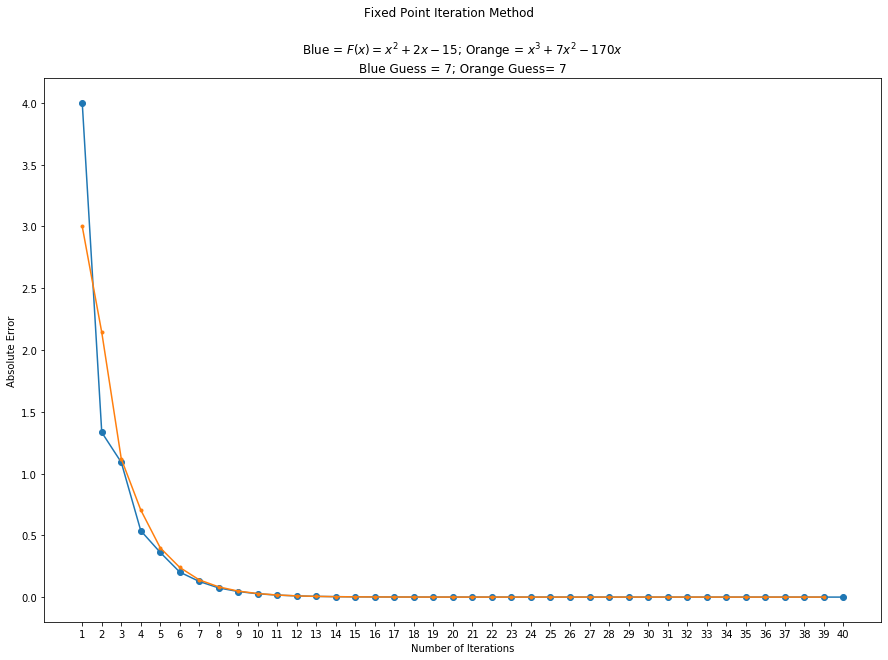

In [11]:
results = FixedPointIteration(g, guess, max_iter, atol)
results2 = FixedPointIteration(g2, guess2, max_iter, atol)

plt.figure(figsize=(15,10))
ax1 = plt.plot([i + 1 for i in range(0,results[1])], [abs(results[2][i] - real_solution) for i in range(0, len(results[2]))], linestyle='-', marker = 'o')
ax2 = plt.plot([i + 1 for i in range(0,results2[1])], [abs(results2[2][i] - real_solution2) for i in range(0, len(results2[2]))], linestyle='-', marker = '.')
plt.suptitle("Fixed Point Iteration Method")
plt.title("Blue = $F(x) = x^{2} + 2x - 15$; Orange = $x^{3} + 7x^{2} - 170x$\nBlue Guess = 7; Orange Guess= 7")
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error")
plt.xticks(range(1,max(results[1]+1, results2[1]+1)))
plt.show()

In [12]:
print("Value of the root approximation for the initial guess ({0}): {1:.20f}".format(guess, results[0]))
print("Value of the root approximation for the initial guess ({0}): {1:.20f}".format(guess, results2[0]))

Value of the root approximation for the initial guess (7): 2.99999999405889106185
Value of the root approximation for the initial guess (7): 9.99999999409507012160


The calculations match with the experiment results as expected.<br>
While it took 29 iterations for bisection method to find the desired roots for both functions, it took 39 and 40 iterations for fixed point method.

## Newton's Method
Different from the previous two methods, Newton's method also requires the function to be smoother and to have a continuous derivative which is a down-side. Another down-side is, the method fails whenever it achieves a derivative value 0, since this means that the tangent line to the function is a straight horizontal line which either won't intersect with the function again or diverge. Nevertheless, since Newton's method converge quadratically (unless we have multiple roots), it can be a consolidated choice when we can offer more information and need more speed.<br>
To use this method, we need the function and its derivative to be continuous in the region which we are searching the root as stated above.<br>
Using NumPy's poly1d and its derivative method, we can easily achieve what we need for the functions $F(x) = x^2 + 2x - 15$ and $f(x) = x^{3} + 7x^{2} - 170x$.

In [13]:
#f was defined as f = np.poly1d([1, 2, -15]) in the cells before
f_deriv = f.deriv()
print(f_deriv)

#f2 was defined as f2 = np.poly1d([0, -17, 10], True) in the cells before
f2_deriv = f2.deriv()
print(f2_deriv)

 
2 x + 2
   2
3 x + 14 x - 170


Since we achieved continuous derivatives for every $x \in \mathbf{R}$, we can move onto coding the method.

In [14]:
def NewtonsMethod(f, guess, max_iter, atol):
    f_deriv = f.deriv()
    guess_list = []
    
    for iter_count in range(max_iter):
        
        if(f_deriv(guess) == 0):
            print("Derivative is zero. The solution cannot be found.")
            return None
        
        step_error = abs(f(guess)/f_deriv(guess))
        guess_list.append(guess)
        
        if(step_error < atol):
            return [guess, iter_count + 1, guess_list]
        guess -= f(guess)/f_deriv(guess)
    
    if(step_error >= atol):
        print("Could not find the root in {0} attempts.".format(max_iter))
        return None

To show that the method fails when it gets the value 0 as the derivative, let's create another function and give it a try.

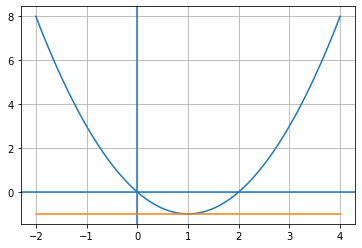

In [15]:
#f3(x) = x^2 - 2x
f3 = np.poly1d([0, 2], True)
f3_deriv = f3.deriv()

x = np.linspace(-2,4,num=100)
y = f3(x)

x1 = 1
y1 = f3(x1)

def line(x, x1, y1):
    return f3_deriv(x1)*(x - x1) + y1

plt.grid()
plt.axvline()
plt.axhline()
ax1 = plt.plot(x, y)
ax1 = plt.plot(np.linspace(-2, 4, 10), line(np.linspace(x1-1, x1+1, 10), x1, y1))
plt.show()

From the plot above it can be seen that the function we just created has a derivative of 0 at the point $x = 1$. <br>
Now let's test our method with $guess = 1$ to see that it fails.

In [16]:
NewtonsMethod(f3, 1, max_iter, atol)

Derivative is zero. The solution cannot be found.


As seen from the result above the method cannot find the roots when the initial guess does not satisfy our requirements. <br>
Only if we tried another guess... <br>

In [17]:
print(f'{NewtonsMethod(f3, -4, max_iter, atol)[0]:.20f}')

-0.00000000001074457931


The result is correct! <br>
The method even found the result more precise than we want, thanks to Newton's method's rate of convergence being quadratic.

Now we are ready to test Newton's method with the functions defined in the beginning as well. <br>
$guess = 7, guess2 = 7, max\_iter = 100$ and $atol = 10^{-8}$. <br>

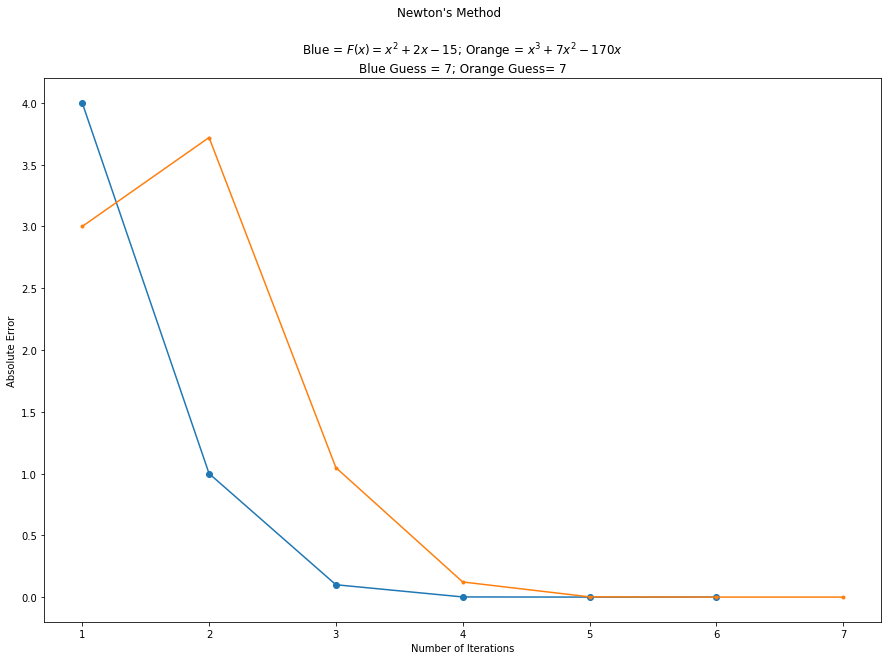

In [18]:
results = NewtonsMethod(f, guess, max_iter, atol)
results2 = NewtonsMethod(f2, guess2, max_iter, atol)

plt.figure(figsize=(15,10))
ax1 = plt.plot([i + 1 for i in range(0,results[1])], [abs(results[2][i] - real_solution) for i in range(0, len(results[2]))], linestyle='-', marker = 'o')
ax2 = plt.plot([i + 1 for i in range(0,results2[1])], [abs(results2[2][i] - real_solution2) for i in range(0, len(results2[2]))], linestyle='-', marker = '.')
plt.suptitle("Newton's Method")
plt.title("Blue = $F(x) = x^{2} + 2x - 15$; Orange = $x^{3} + 7x^{2} - 170x$\nBlue Guess = 7; Orange Guess= 7")
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error")
plt.xticks(range(1,max(results[1]+1, results2[1]+1)))
plt.show()

In [19]:
print("Value of the root approximation for the initial guess ({0}): {1:.20f}".format(guess, results[0]))
print("Value of the root approximation for the initial guess ({0}): {1:.20f}".format(guess2, results2[0]))

Value of the root approximation for the initial guess (7): 3.00000000000000399680
Value of the root approximation for the initial guess (7): 10.00000000000004085621


We achieve the correct results once more.

## Secant Method
Secant method is a variant of Newton's method which we approximate the function's derivative using a finite difference approximation. This means that we can dodge calculating the derivative which can be a burden at times where the derivative is hard to evaluate (it may not even exist) and still achieve the result but the method is slower when compared to Newton's method since it converges superlinearly. It can also fail completely too. 

In [20]:
def SecantMethod(f, guess_0, guess, max_iter, atol):
    guess_list = []
    
    if(guess_0 == guess):
        print("Invalid guess.")
        return None
    
    for iter_count in range(max_iter):
        step_error = abs(f(guess)*(guess - guess_0)/(f(guess) - f(guess_0)))
        guess_list.append(guess)
        
        if(step_error < atol):
            return [guess, iter_count + 1, guess_list]
        
        temp = guess
        guess -= f(guess)*(guess - guess_0)/(f(guess) - f(guess_0))
        guess_0 = temp
        
    if(step_error >= atol):
        print("Could not find the root in {0} attempts.".format(max_iter))
        return None

Now to test Secant method; <br>
$guess_0 = 5, guess = 7, guess_02 = 5, guess2 = 7, max\_iter = 100$ and $atol = 10^{-8}$. <br>

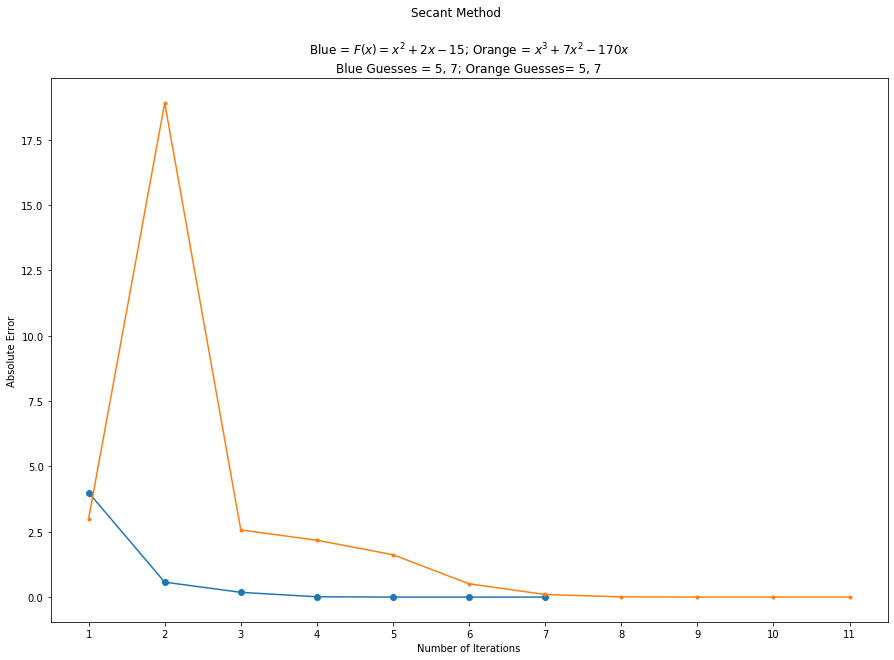

In [21]:
results = SecantMethod(f, guess_0, guess, max_iter, atol)
results2 = SecantMethod(f2, guess_02, guess2, max_iter, atol)

plt.figure(figsize=(15,10))
ax1 = plt.plot([i + 1 for i in range(0,results[1])], [abs(results[2][i] - real_solution) for i in range(0, len(results[2]))], linestyle='-', marker = 'o')
ax2 = plt.plot([i + 1 for i in range(0,results2[1])], [abs(results2[2][i] - real_solution2) for i in range(0, len(results2[2]))], linestyle='-', marker = '.')
plt.suptitle("Secant Method")
plt.title("Blue = $F(x) = x^{2} + 2x - 15$; Orange = $x^{3} + 7x^{2} - 170x$\nBlue Guesses = 5, 7; Orange Guesses= 5, 7")
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error")
plt.xticks(range(1,max(results[1]+1, results2[1]+1)))
plt.show()

In [22]:
print("Value of the root approximation for the initial guesses ({0}, {1}): {2:.20f}".format(guess_0, guess, results[0]))
print("Value of the root approximation for the initial guesses ({0}, {1}): {2:.20f}".format(guess_02, guess2, results2[0]))

Value of the root approximation for the initial guesses (5, 7): 3.00000000001284572448
Value of the root approximation for the initial guesses (5, 7): 10.00000000000149213975


We get the correct results again and as expect it took more iterations to find compared to Newton's method.

# PA = LU Factorization
a) Since A is a 4x4 matrix, we will need 3 steps to complete the process. <br>
Step 1: Clearing column 1, no row interchanges needed since the biggest value is already on the top; <br>
    $A_1 = M_1P_1A$ <br><br>
    $\begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & 0 & -1 & 1 \\
    0 & -1 & 2 & -1 \\
    0 & \frac{3}{2} & -1 & 0
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    \frac{1}{2} & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & 0 & -1 & 1 \\
    0 & -1 & 2 & -1 \\
    -1 & 2 & -1 & 0
    \end{pmatrix}
    $ <br><br>
Step 2: Clearing column 2, we need to interchange row 2 and 4 to avoid failing; <br>
    $A_2 = M_2P_2A_1$ <br><br>
    $\begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & \frac{3}{2} & -1 & 0 \\
    0 & 0 & \frac{4}{3} & -1 \\
    0 & 0 & -1 & -1
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & \frac{2}{3} & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & 0 & -1 & 1 \\
    0 & -1 & 2 & -1 \\
    0 & \frac{3}{2} & -1 & 0
    \end{pmatrix}
    $ <br><br>
Step 3: Clearing column 3, no need to interchange again. <br>
    $U = A_3 = M_3P_3A_2$ <br><br>
    $\begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & \frac{3}{2} & -1 & 0 \\
    0 & 0 & \frac{4}{3} & -1 \\
    0 & 0 & 0 & \frac{1}{4}
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & \frac{3}{4} & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & \frac{3}{2} & -1 & 0 \\
    0 & 0 & \frac{4}{3} & -1 \\
    0 & 0 & -1 & -1
    \end{pmatrix}
    $ <br><br>
Now we can start finding P and L.<br>
Since $P_1$ and $P_3$ are identity matrices we can ignore them in our calculations. <br>
From $P = P_3P_2P_1$, we get; <br><br>
    $P = \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix}$

To find $L$, we need the inverse of matrix $\tilde{M}$ which is the following for this particular case; <br>
$\tilde{M} = \tilde{M_3}\tilde{M_2}\tilde{M_1}$ <br><br>
So to find $\tilde{M}$, first we have to calculate $\tilde{M_1}$, $\tilde{M_2}$ and $\tilde{M_3}$. <br><br>
For $\tilde{M_3}$ :<br>
$\tilde{M_3} = M_3 = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & \frac{3}{4} & 1
    \end{pmatrix}$ <br><br>
For $\tilde{M_2}$ : <br>
$\tilde{M_2} = P_3M_2(P_3)^{T}$ <br> $P_3 = (P_3)^{T} = I$ <br> $\tilde{M_2} = M_2 =
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & \frac{2}{3} & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}$ <br><br>
For $\tilde{M_1}$ : <br>e
$\tilde{M_1} = P_3P_2M_1(P_2)^{T}(P_3)^{T}$ <br> $P_3 = (P_3)^{T} = I$ <br> $P_2 = (P_2)^{T}$ since $P_2$ is symmetric <br> $\tilde{M_1} = P_2M_1(P_2)^{T}$ <br>

$ \tilde{M_1} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    \frac{1}{2} & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    \frac{1}{2} & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}$ <br><br>
    $\tilde{M} = \tilde{M_3}\tilde{M_2}\tilde{M_1} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & \frac{3}{4} & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & \frac{2}{3} & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    \frac{1}{2} & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    \frac{1}{2} & 1 & 0 & 0 \\
    \frac{1}{3} & \frac{2}{3} & 1 & 0 \\
    \frac{1}{4} & \frac{1}{2} & \frac{3}{4} & 1
    \end{pmatrix}
    $ <br><br>
    And finally, <br><br>
    $L = (\tilde{M})^{-1} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    -\frac{1}{2} & 1 & 0 & 0 \\
    0 & -\frac{2}{3} & 1 & 0 \\
    0 & 0 & -\frac{3}{4} & 1
    \end{pmatrix}
    $

$PA = LU$ <br><br>
    $\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix} \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & 0 & -1 & 1 \\
    0 & -1 & 2 & -1 \\
    -1 & 2 & -1 & 0
    \end{pmatrix} = 
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    -\frac{1}{2} & 1 & 0 & 0 \\
    0 & -\frac{2}{3} & 1 & 0 \\
    0 & 0 & -\frac{3}{4} & 1
    \end{pmatrix}
    \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & \frac{3}{2} & -1 & 0 \\
    0 & 0 & \frac{4}{3} & -1 \\
    0 & 0 & 0 & \frac{1}{4}
    \end{pmatrix}
    $

b) For this part we can use the L and U we found in part a.<br>
To find $x$, we can simply do the following and find the solution using backward and forward substitution algorithms; <br>
$Ly = Pb$ <br>
$Ux = y$ <br>
$Pb =
    \begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & 1 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix}
    1\\
    0\\
    0\\
    0
    \end{pmatrix} = 
    \begin{pmatrix}
    1\\
    0\\
    0\\
    0
    \end{pmatrix}$ <br>
    Now, we can move onto finding $y$ since we know both $L$ and $Pb$.<br><br>
    $\begin{pmatrix}
    1 & 0 & 0 & 0\\
    -\frac{1}{2} & 1 & 0 & 0 \\
    0 & -\frac{2}{3} & 1 & 0 \\
    0 & 0 & -\frac{3}{4} & 1
    \end{pmatrix}
    \begin{pmatrix}
    y_1\\
    y_2\\
    y_3\\
    y_4
    \end{pmatrix} = 
    \begin{pmatrix}
    1\\
    0\\
    0\\
    0
    \end{pmatrix}$ <br><br>
    Using forward substitution yields:<br><br>
    $y = 
    \begin{pmatrix}
    1\\
    1/2\\
    1/3\\
    1/4
    \end{pmatrix}
    $ <br><br>
    Since we know $y$ and $U$, we can finish the calculation using backward substitution. <br><br>
    $
    \begin{pmatrix}
    2 & -1 & 0 & 0\\
    0 & \frac{3}{2} & -1 & 0 \\
    0 & 0 & \frac{4}{3} & -1 \\
    0 & 0 & 0 & \frac{1}{4}
    \end{pmatrix} 
    \begin{pmatrix}
    x_1\\
    x_2\\
    x_3\\
    x_4
    \end{pmatrix} = 
    \begin{pmatrix}
    1\\
    1/2\\
    1/3\\
    1/4
    \end{pmatrix}$ <br><br>
    Using backward substitution yields:<br><br>
    $x = 
    \begin{pmatrix}
    1\\
    1\\
    1\\
    1
    \end{pmatrix}
    $ <br><br>

# An algorithm to find most influential papers
The first algorithm I decided to try using, uses the number of citations a paper got from others to decide how influential the paper is (basic in-degree centrality). In order to do this, I decided to use a Python dictionary since it is implemented as a hashtable which has amortized O(1) lookup time and O(n) memory complexity. The dictionary has the ids of the papers as keys and the number of times that id is citated as values. To get the top 10 papers, I simply used nlargest from heapq module since it is faster than sorting.

In [23]:
import time
from heapq import nlargest

#get the starting time
start = time.time()

#import the data
dataset_array = np.genfromtxt("cit-HepTh.txt", skip_header=4, dtype=int)

#initialize the dictionary
id_dictionary = {}

for data in dataset_array:
    #if the key exists increment its value by one
    if id_dictionary.get(data[1]):
        id_dictionary[data[1]] += 1
    #else create a new key value pair(id : 1)
    else:
        id_dictionary[data[1]] = 1

top_ten = nlargest(10, id_dictionary, key = id_dictionary.get) 

for i in range(10):
    print("{0}. {1} - {2} times".format(i + 1, top_ten[i], id_dictionary[top_ten[i]]))

#get the ending time
end = time.time()

#print the difference to find time elapsed
print("Time elapsed: {0} seconds.".format(end - start))

1. 9711200 - 2414 times
2. 9802150 - 1775 times
3. 9802109 - 1641 times
4. 9407087 - 1299 times
5. 9610043 - 1199 times
6. 9510017 - 1155 times
7. 9908142 - 1144 times
8. 9503124 - 1114 times
9. 9906064 - 1032 times
10. 9408099 - 1006 times
Time elapsed: 1.650054693222046 seconds.


Another way to decide a paper's importance would be converting the dataset into a graph and using the centrality property of the nodes. This method decides the importance of a paper by looking at its neighbours' importance. The nodes with more important neighbours gain higher scores compared to others. Following code uses eigenvector centrality to achieve this.

In [24]:
import networkx as nx

start = time.time()
dataset_array = np.genfromtxt("cit-HepTh.txt",skip_header=4,dtype=int)

G = nx.DiGraph()

for data in dataset_array:
    G.add_edge(data[0], data[1])

centrality = nx.eigenvector_centrality_numpy(G)

top_ten = nlargest(10, centrality, key = centrality.get) 

for i in range(10):
    print("{0}. {1} - {2} eigenvector centrality score, cited {3} times".format(i + 1, top_ten[i], centrality[top_ten[i]], id_dictionary[top_ten[i]]))
    
end = time.time()
print("Time elapsed: {0} seconds.".format(end - start))

1. 9410167 - 0.25802129275036234 eigenvector centrality score, cited 748 times
2. 9503124 - 0.2537009665842248 eigenvector centrality score, cited 1114 times
3. 9207053 - 0.22912915964505004 eigenvector centrality score, cited 102 times
4. 9402002 - 0.2185809147534801 eigenvector centrality score, cited 282 times
5. 9305185 - 0.20821343366834785 eigenvector centrality score, cited 171 times
6. 9205027 - 0.18637890152325381 eigenvector centrality score, cited 191 times
7. 9407087 - 0.18610320992515425 eigenvector centrality score, cited 1299 times
8. 9211056 - 0.17687337618265953 eigenvector centrality score, cited 68 times
9. 9207016 - 0.17248051978323245 eigenvector centrality score, cited 219 times
10. 9304154 - 0.17051221326239968 eigenvector centrality score, cited 229 times
Time elapsed: 3.3530795574188232 seconds.


Both algorithms have results in common. To achieve a better result, results from the both algorithms can be taken and a unified result can be composed which takes both popularity and importance in account. Using the pagerank algorithm yields that.

In [25]:
start = time.time()
dataset_array = np.genfromtxt("cit-HepTh.txt",skip_header=4,dtype=int)

G = nx.DiGraph()

for data in dataset_array:
    G.add_edge(data[0], data[1])

centrality = nx.pagerank(G)

top_ten = nlargest(10, centrality, key = centrality.get) 

for i in range(10):
    print("{0}. {1} - {2} pagerank score, cited {3} times".format(i + 1, top_ten[i], centrality[top_ten[i]], id_dictionary[top_ten[i]]))
    
end = time.time()
print("Time elapsed: {0} seconds.".format(end - start))

1. 9407087 - 0.006238910935211816 pagerank score, cited 1299 times
2. 9503124 - 0.004632588508880583 pagerank score, cited 1114 times
3. 9510017 - 0.004385169336798882 pagerank score, cited 1155 times
4. 9402044 - 0.003935347334410061 pagerank score, cited 257 times
5. 9711200 - 0.003409682539237107 pagerank score, cited 2414 times
6. 9410167 - 0.003407370515336672 pagerank score, cited 748 times
7. 9408099 - 0.003189869048538741 pagerank score, cited 1006 times
8. 9207016 - 0.0031138613638518916 pagerank score, cited 219 times
9. 9402002 - 0.002962458707729362 pagerank score, cited 282 times
10. 9610043 - 0.002752903011864363 pagerank score, cited 1199 times
Time elapsed: 8.67304515838623 seconds.
